# HR Attrition analysis

# Packages

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [6]:
df=pd.read_csv('HR-Employee-Attrition.csv')

In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [27]:
# List of numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numeric columns:", num_cols)

#Education is coded as num, but it represents levels 


Numeric columns: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [14]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [24]:
# List of categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", cat_cols)

Categorical columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [10]:
#there is no missing data
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Visualisation

Target variable


In [13]:
#data is imbalanced (only 16% of employees leave). to be considered during model training
(df['Attrition'].value_counts(normalize=True)*100).round(2)

Attrition
No     83.88
Yes    16.12
Name: proportion, dtype: float64

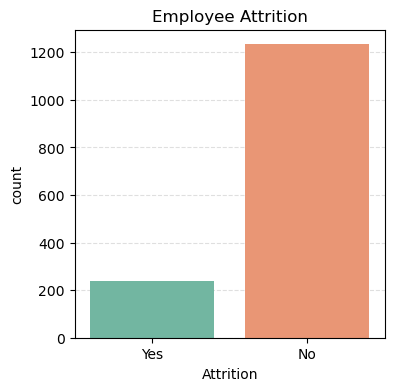

In [28]:
fig, ax = plt.subplots(figsize=(4,4))

sns.countplot(
    ax=ax,
    data=df,
    x='Attrition',
    hue='Attrition',
    palette='Set2',
    legend=False
)

plt.title('Employee Attrition')

ax.grid(True, axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

plt.show()


Univariate analysis


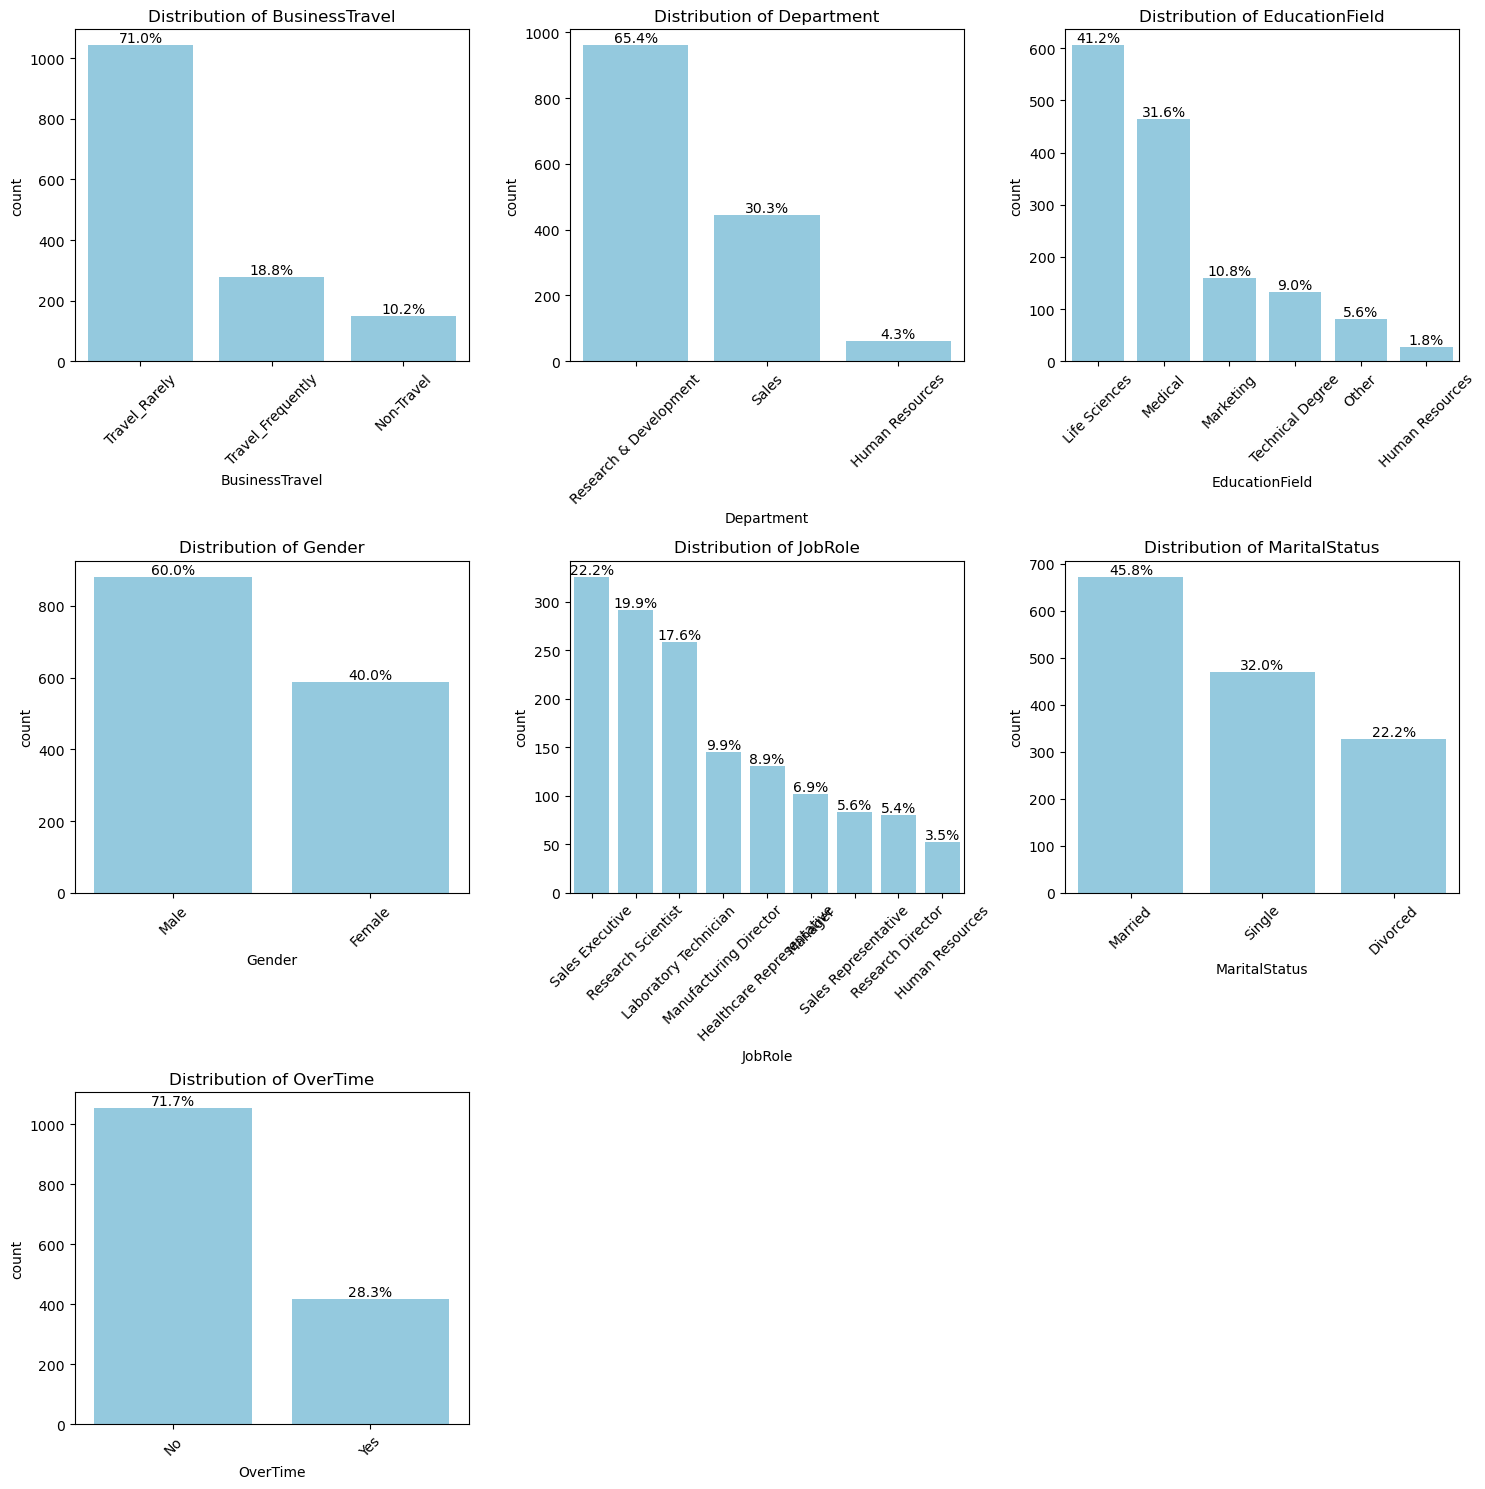

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_vars = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

n = len(cat_vars)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))
axes = axes.flatten()

for i, col in enumerate(cat_vars):
    # Get descending order of categories
    order = df[col].value_counts().index
    ax = sns.countplot(x=col, data=df, ax=axes[i], color='skyblue', order=order)
    
    # Add percentages on top of bars
    total = len(df)
    for p in ax.patches:
        percentage = f'{100 * p.get_height()/total:.1f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width()/2., p.get_height()),
                    ha='center', va='bottom', fontsize=10)
    
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.tick_params(axis='x', rotation=45)

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [51]:
num_vars = [
    'Age',
    'DailyRate',
    'DistanceFromHome',
    'HourlyRate',
    'MonthlyIncome',
    'MonthlyRate',
    'NumCompaniesWorked',
    'PercentSalaryHike',
    'TotalWorkingYears',
    'TrainingTimesLastYear',
    'YearsAtCompany',
    'YearsInCurrentRole',
    'YearsSinceLastPromotion',
    'YearsWithCurrManager'
]

print("Continuous numeric variables for analysis:", num_vars)


Continuous numeric variables for analysis: ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


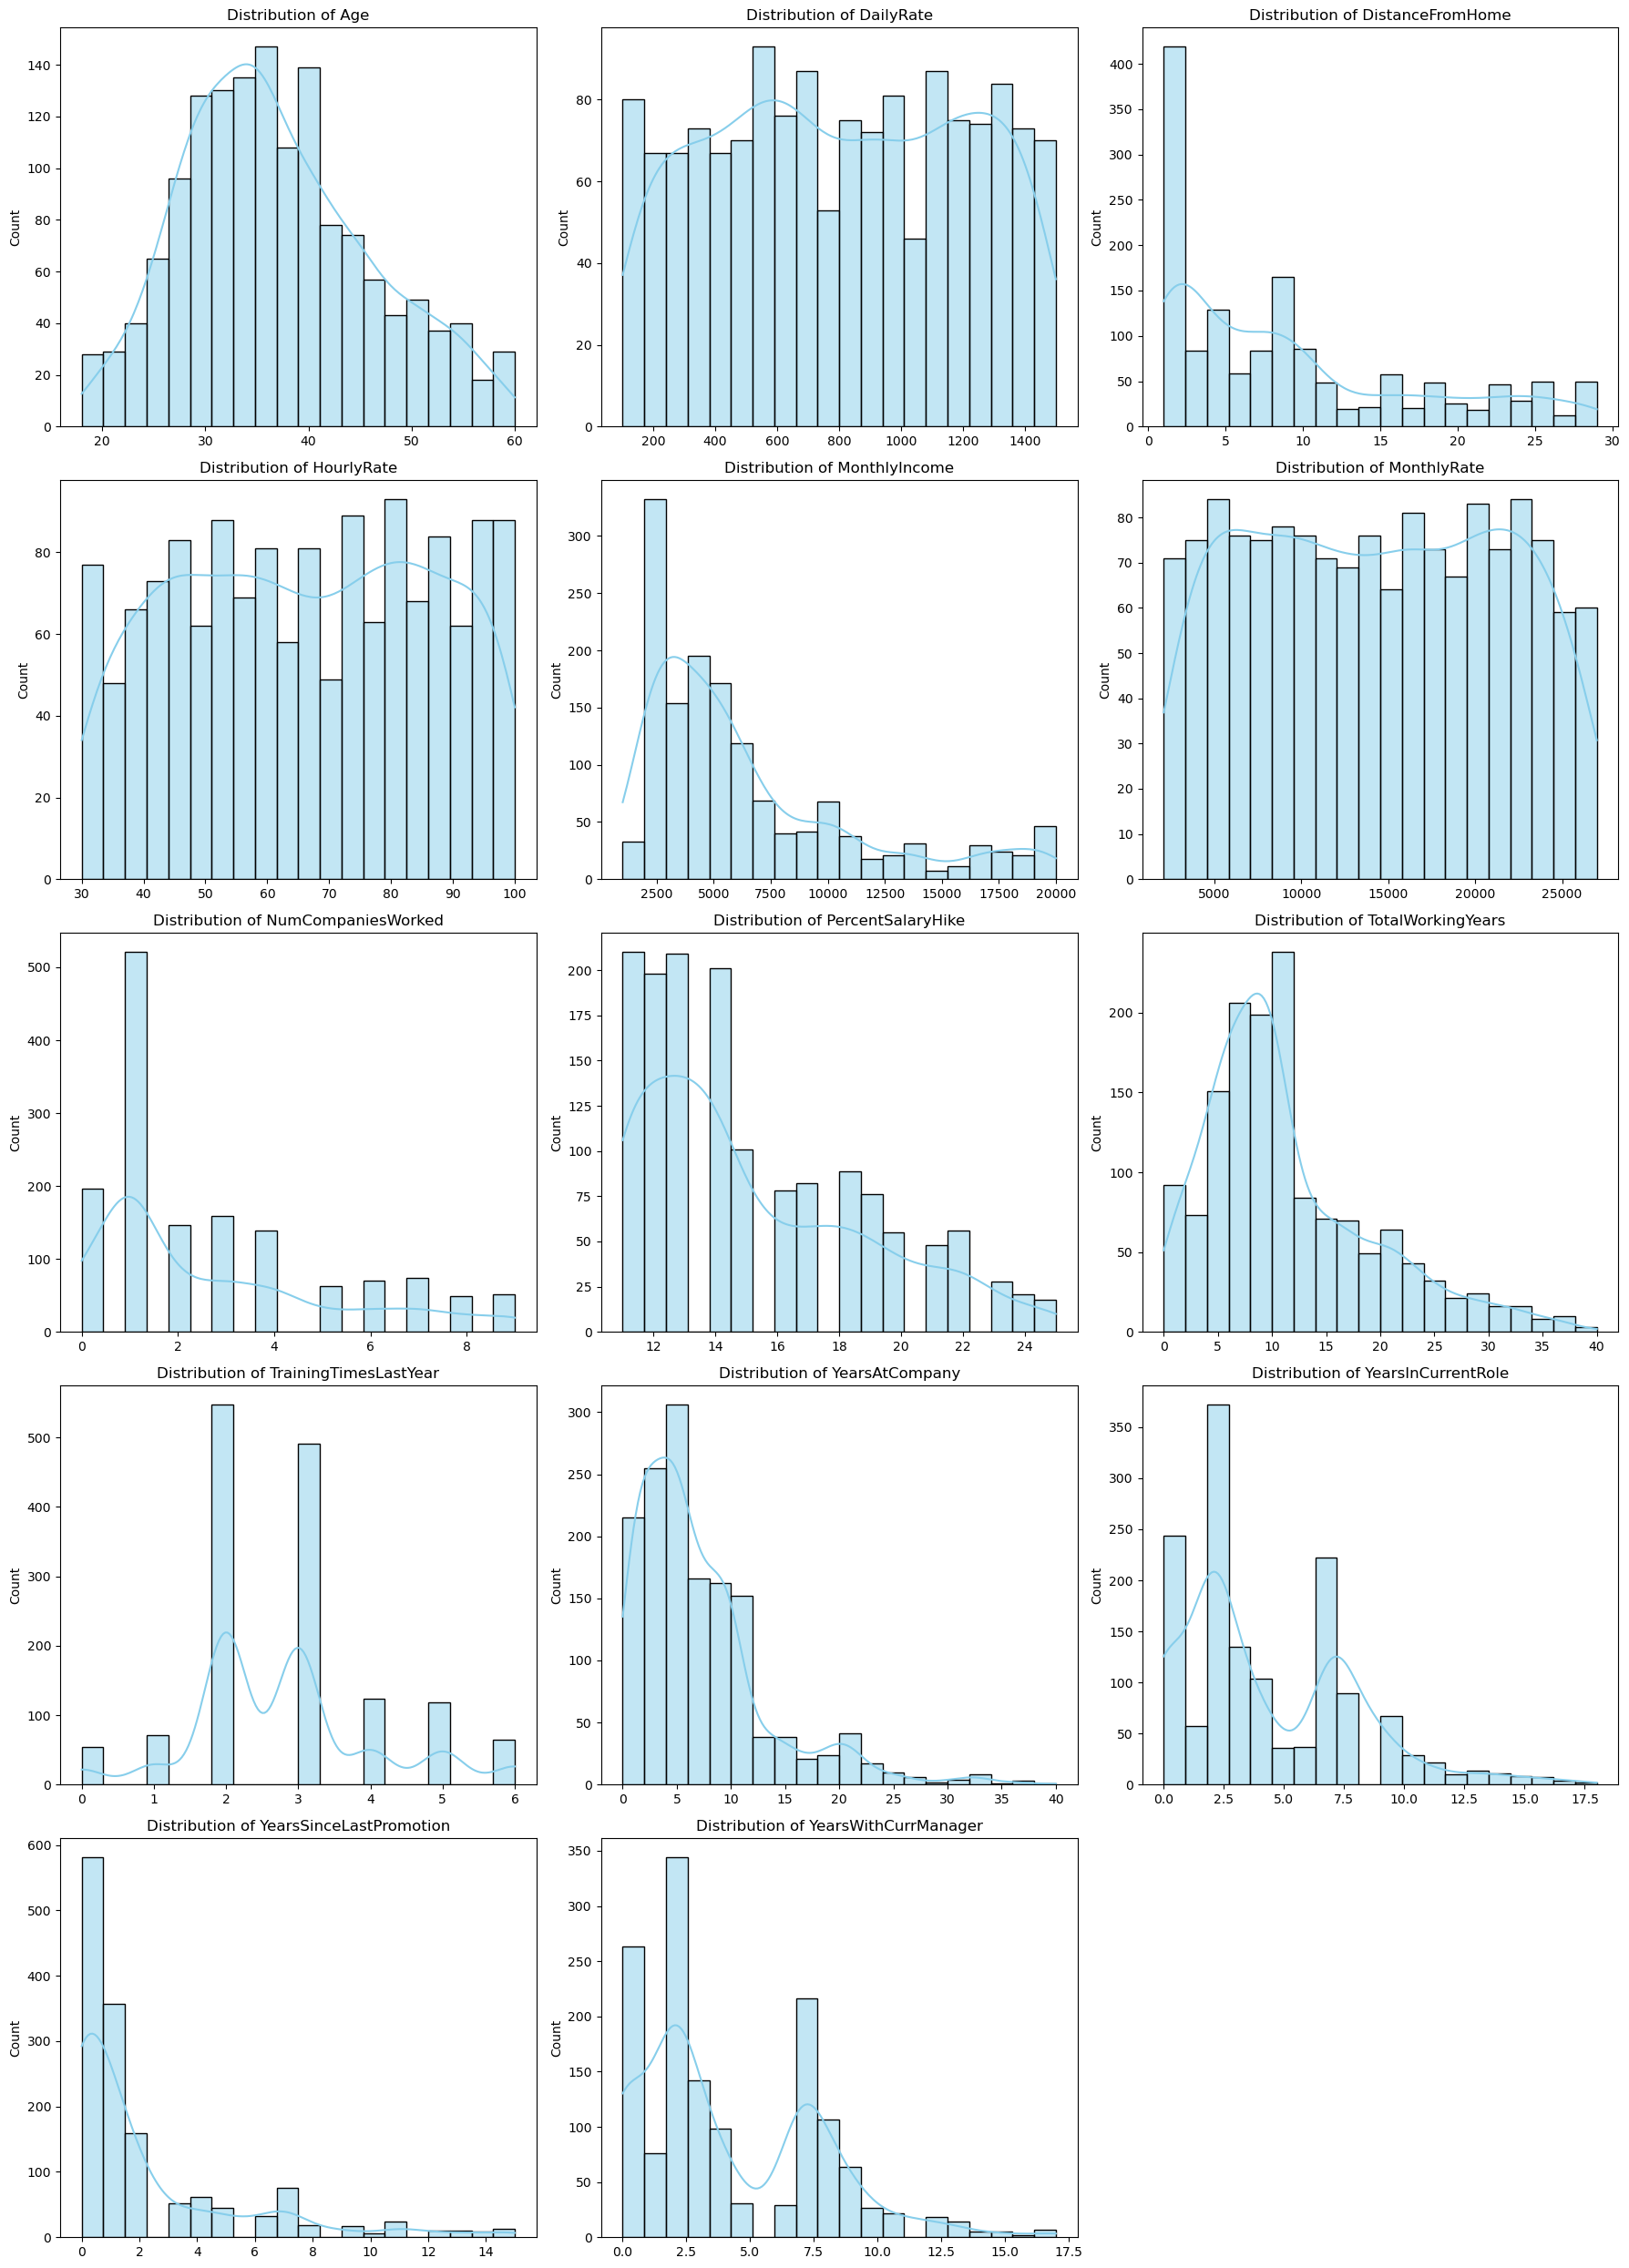

In [52]:
cols = 3
rows = (len(num_vars) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 5*rows))
axes = axes.flatten()

for i, col in enumerate(num_vars):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue', bins=20)
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


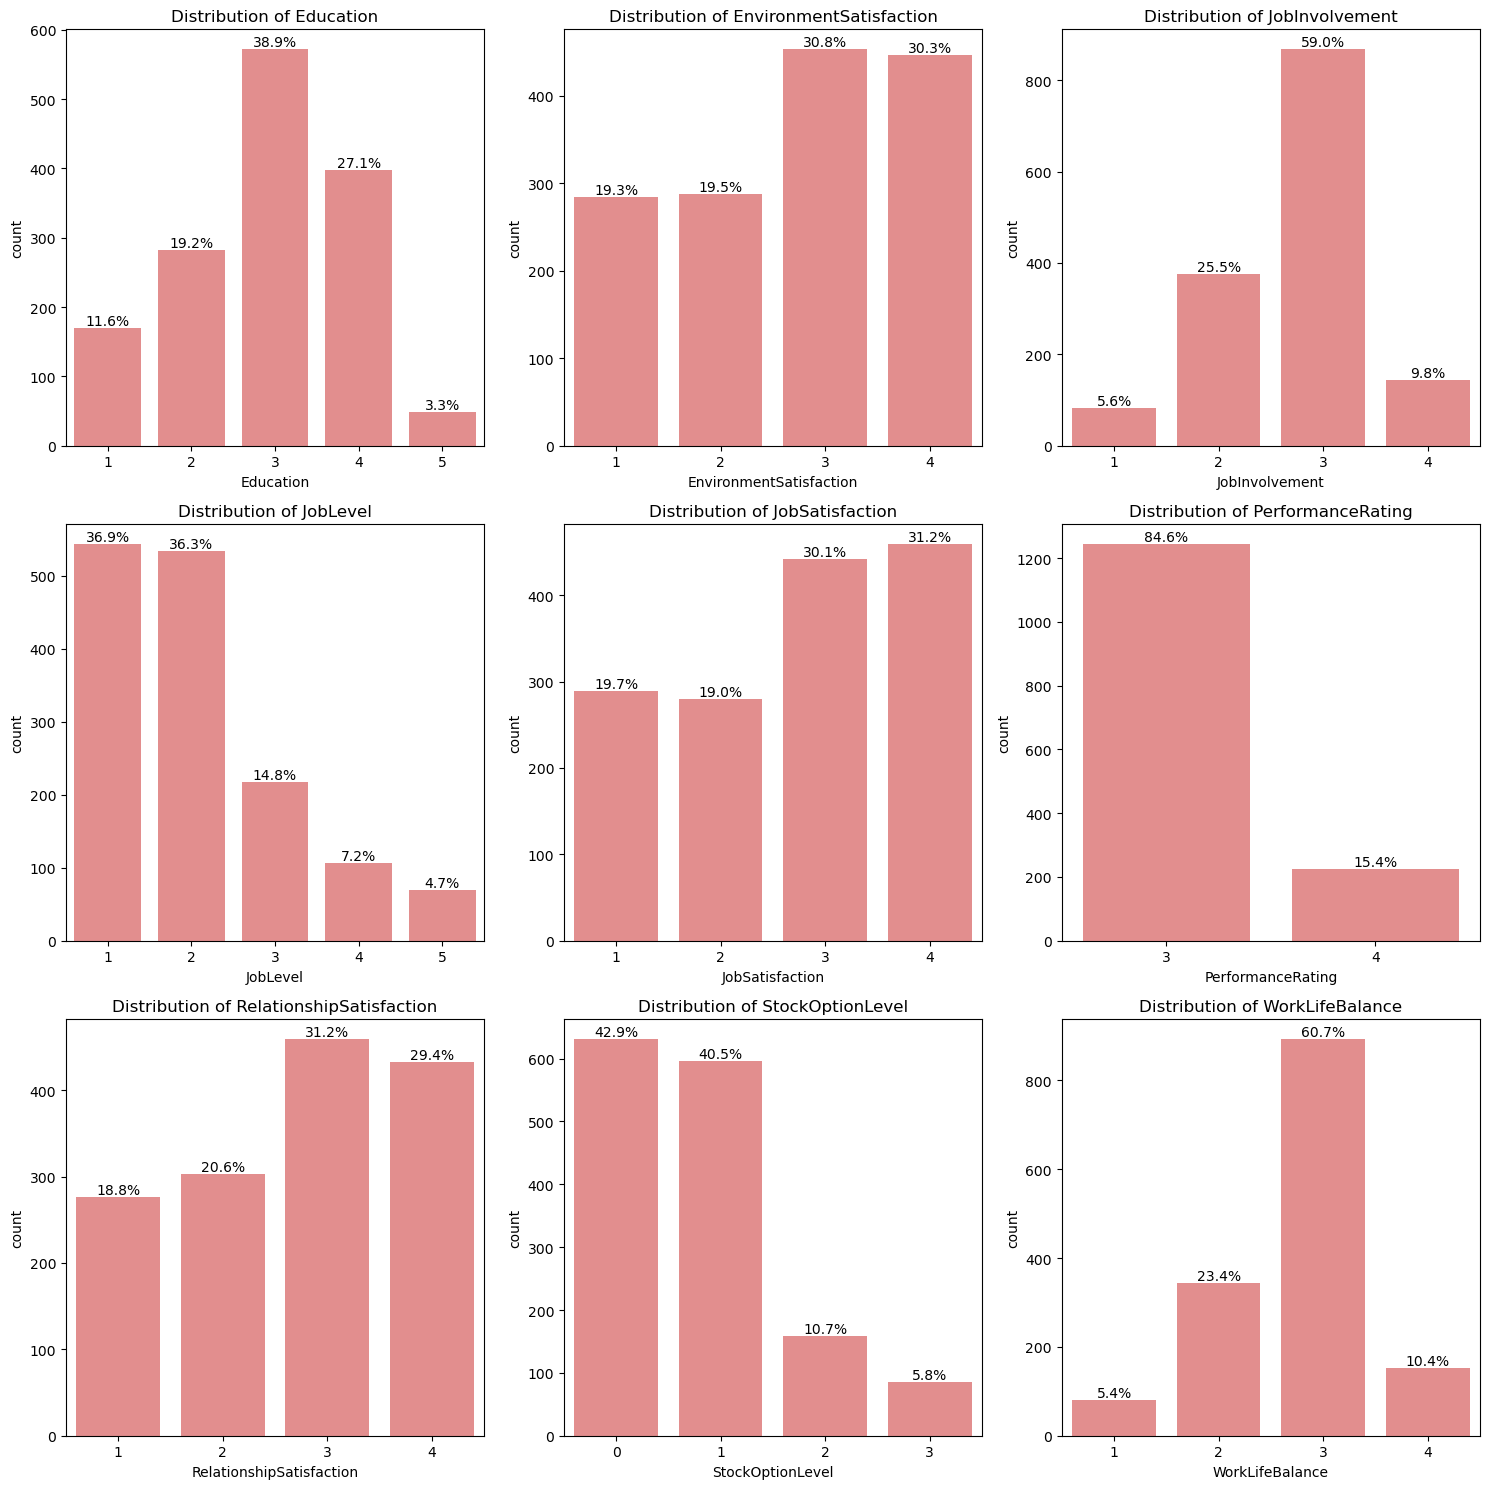

In [54]:
ordinal_vars = [
    'Education',            
    'EnvironmentSatisfaction',  
    'JobInvolvement',       
    'JobLevel',             
    'JobSatisfaction',      
    'PerformanceRating',   
    'RelationshipSatisfaction',
    'StockOptionLevel',    
    'WorkLifeBalance'      
]


import matplotlib.pyplot as plt
import seaborn as sns

n = len(ordinal_vars)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))
axes = axes.flatten()

for i, col in enumerate(ordinal_vars):
    order = sorted(df[col].unique())  
    ax = sns.countplot(x=col, data=df, ax=axes[i], color='lightcoral', order=order)
    
    total = len(df)
    for p in ax.patches:
        percentage = f'{100 * p.get_height()/total:.1f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width()/2., p.get_height()),
                    ha='center', va='bottom', fontsize=10)
    
    ax.set_title(f'Distribution of {col}', fontsize=12)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()





Bivariate analysis

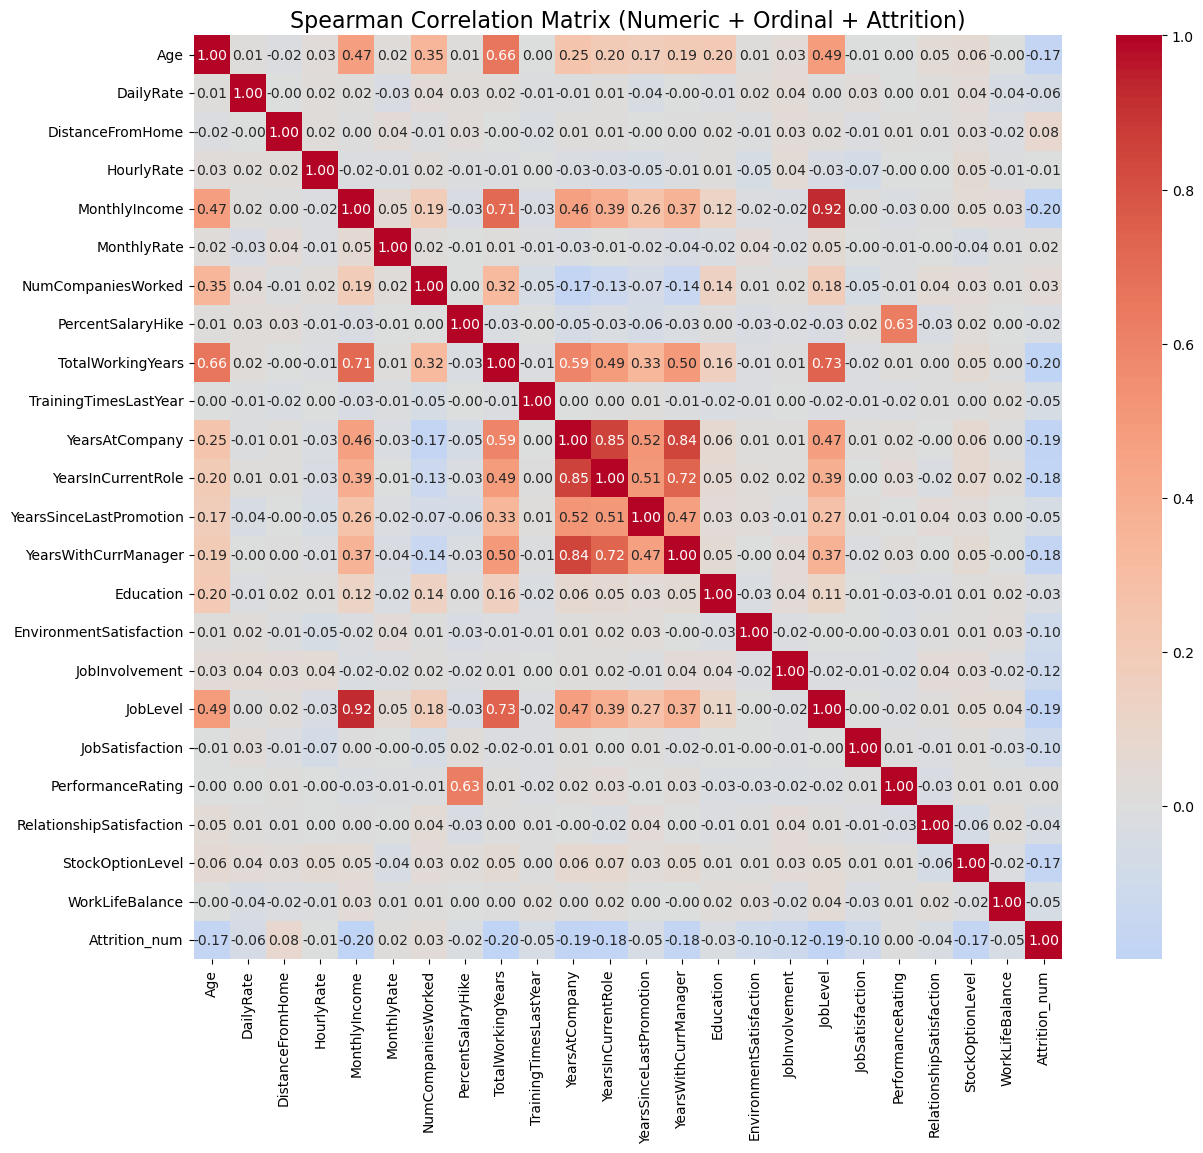

In [57]:
df['Attrition_num'] = df['Attrition'].map({'No': 0, 'Yes': 1})

corr_vars = num_vars + ordinal_vars + ['Attrition_num']

corr = df[corr_vars].corr(method='spearman')


plt.figure(figsize=(14,12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Spearman Correlation Matrix (Numeric + Ordinal + Attrition)", fontsize=16)
plt.show()



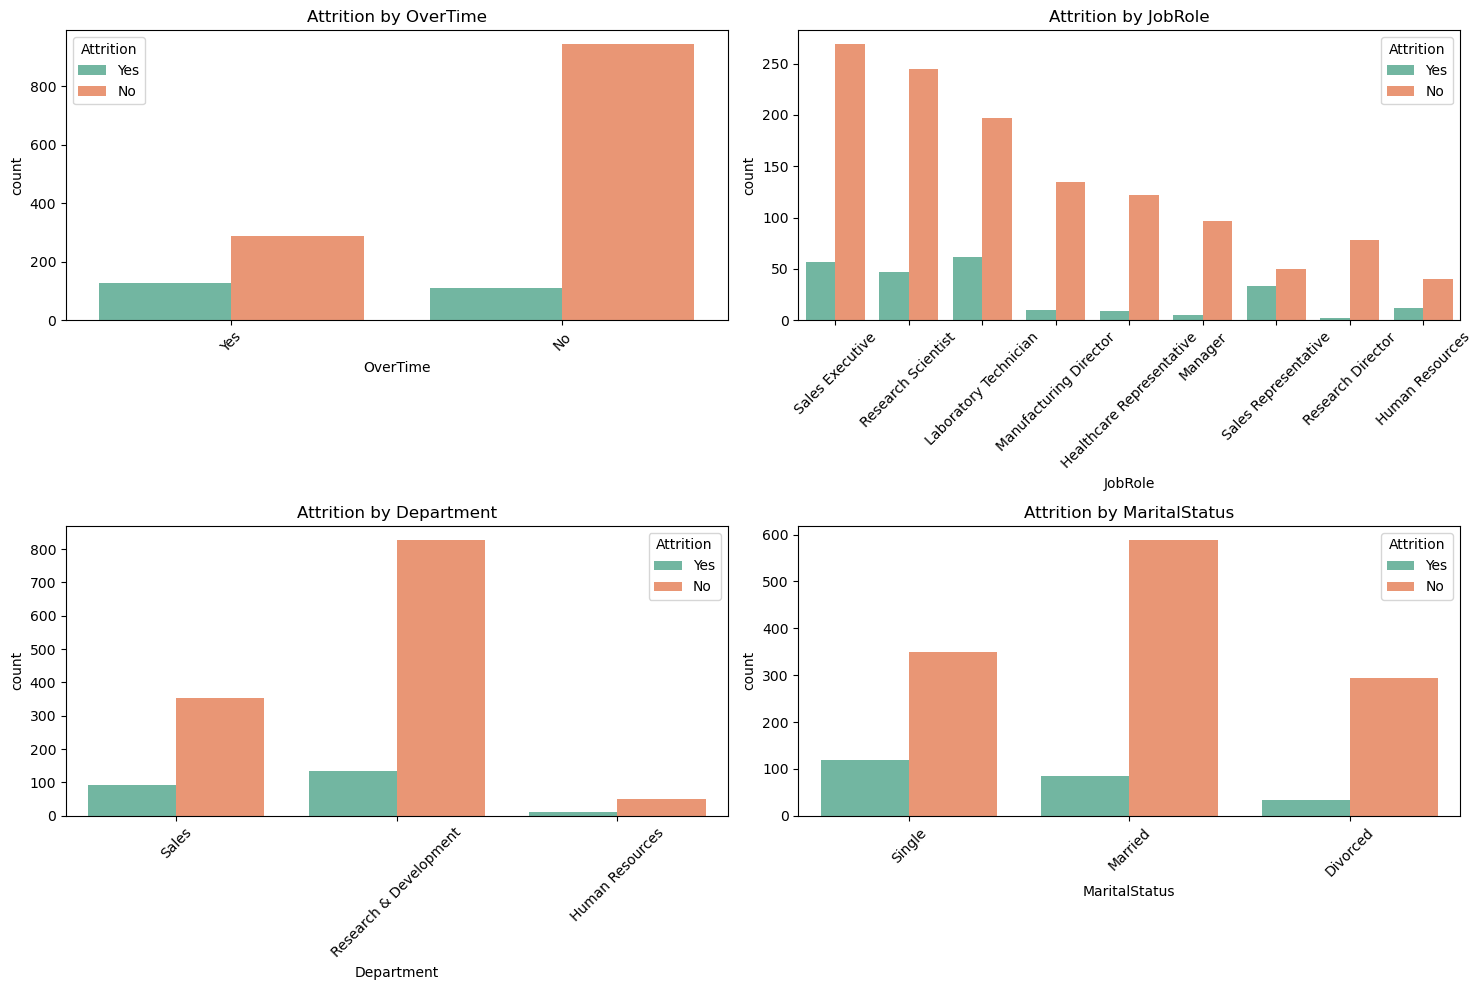

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_features = ['OverTime', 'JobRole', 'Department', 'MaritalStatus']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))  
axes = axes.flatten()  

for i, col in enumerate(cat_features):
    sns.countplot(x=col, hue='Attrition', palette='Set2', data=df, ax=axes[i])
    axes[i].set_title(f'Attrition by {col}')
    axes[i].tick_params(axis='x', rotation=45)  

plt.tight_layout()
plt.show()
